In [2]:
import qiskit
from naniwa.converter import qulacs_converter
from qulacs import QuantumCircuit, ParametricQuantumCircuit
from qulacs.gate import Identity, X, Y, Z, H, S, Sdag, T, Tdag, sqrtX, sqrtXdag, sqrtY, sqrtYdag, CNOT, CZ, SWAP, RX, RY, RZ, Pauli, PauliRotation, U1, U2, U3, DenseMatrix, Measurement, BitFlipNoise, DephasingNoise,  DepolarizingNoise
# TODO: resolve IndepenedentXZNoise
# Doc https://dojo.qulacs.org/ja/latest/notebooks/3.1_Qulacs_tutorial.html
import matplotlib.pyplot as plt

In [3]:
def sample_circuit():
    circuit = ParametricQuantumCircuit(6)
    circuit.add_X_gate(0)
    circuit.add_Y_gate(0)
    circuit.add_Z_gate(0)
    circuit.add_H_gate(0)
    circuit.add_S_gate(0)
    circuit.add_Sdag_gate(0)
    circuit.add_T_gate(0)
    circuit.add_Tdag_gate(0)
    
    circuit.add_gate(Identity(1))
    circuit.add_gate(H(1))
    circuit.add_gate(X(1))
    circuit.add_gate(Y(1))
    circuit.add_gate(Z(1))
    circuit.add_gate(S(1))
    circuit.add_gate(Sdag(1))
    circuit.add_gate(T(1))
    circuit.add_gate(Tdag(1))
    circuit.add_gate(sqrtX(1))
    circuit.add_gate(sqrtXdag(1))
    circuit.add_gate(sqrtY(1))
    circuit.add_gate(sqrtYdag(1))
    circuit.add_gate(RX(1,0.10))
    circuit.add_gate(RY(1,0.20))
    circuit.add_gate(RZ(1,0.30))
    circuit.add_gate(CNOT(1,2))
    circuit.add_gate(SWAP(1,2))
    circuit.add_gate(CZ(1,2))

    circuit.add_gate(DenseMatrix(1, [[0,1],[1,0]]))

    # Pauli
    target_list = [0,3,5]
    pauli_index = [1,3,1] # 1:X , 2:Y, 3:Z
    circuit.add_gate(Pauli(target_list, pauli_index))

    angle = 0.5
    gate = PauliRotation(target_list, pauli_index, angle)

    return circuit

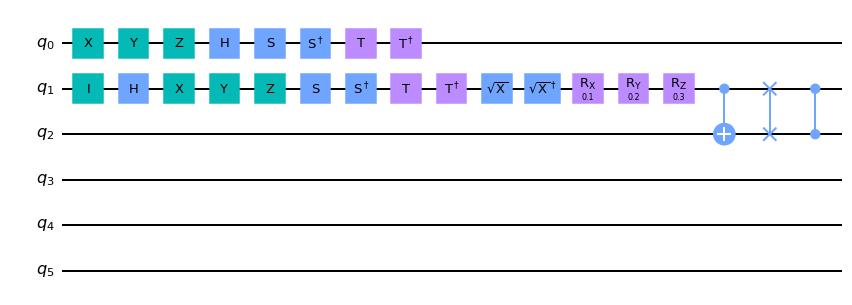

In [4]:
circuit_qulacs = sample_circuit()
circuit = qulacs_converter.QulacsConverter(circuit_qulacs)
circuit_qiskit = circuit.qiskit_convert()
circuit_qiskit.draw(output="mpl")